In [6]:
from IPython.display import Video
from IPython.display import YouTubeVideo
import pyautogui as pag
import time

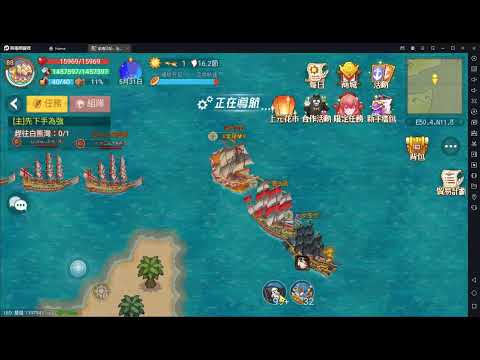

In [7]:
#練習紀錄影片(Youtube)
#影片連結： https://youtu.be/nTLt2Pt87UU
YouTubeVideo('nTLt2Pt87UU')

In [122]:
#滑鼠定位
pag.position()

#Point(x=238, y=217)商品1
#Point(x=521, y=210)商品2
#Point(x=246, y=357)商品3
#Point(x=508, y=361)商品4
#Point(x=246, y=504)商品5
#Point(x=542, y=504)商品6
#Point(x=240, y=646)商品7
#Point(x=527, y=646)商品8

Point(x=1520, y=111)

In [114]:
#pyautogui.press+sleep組合鍵
def press_sleep(key,t):
    pag.press(key)
    time.sleep(t)
    
#點擊座標組合鍵
def click_xy(x,y):
    pag.moveTo(x,y)
    time.sleep(0.3)
    pag.click()

#購買指定商品 buy = [itemDict指定商品]
itemDict = \
{1:[238,217],2:[521,210],3:[246,357],4:[508,361],\
 5:[246,504],6:[542,504],7:[240,646],8:[527,646]}

def buyGood(buy):
    for i in buy:
        click_xy(itemDict[i][0],itemDict[i][1])
        time.sleep(0.5)
        click_xy(1157,244)
        time.sleep(1)

#交易介面
def trading():
    press_sleep("num0",5)
    press_sleep("num1",5)
    pag.press("num7")
    
#出港介面
def out_port():
    time.sleep(2.5)
    press_sleep("num2",4)
    
#導航介面
def navigation(t):
    time.sleep(2)
    press_sleep("num3",2)
    pag.press("space")
    time.sleep(t)
    
#縮小地圖
def zoomOutMap(t):
    time.sleep(3)
    for i in range(t):
        time.sleep(1.2)
        pag.press("num9")
    time.sleep(2)

#點擊下一個港口+合併縮小地圖
def next_port(x,y,zoom = None):
    if zoom == None:        
        click_xy(x,y)
    else:
        zoomOutMap(zoom)
        click_xy(x,y)
        
#出售貨物
def selfGoods():
    time.sleep(2)
    press_sleep("num0",5)
    press_sleep("space",1)
    press_sleep("num8",1)
    pag.press("num7")
    
#使用海盜旗
def flag():
    time.sleep(8)
    click_xy(933,840)
    
#跑商流程合併(推薦品)
def run_trading(x,y,t,zoom = None):
    next_port(x,y,zoom)
    navigation(t)
    trading()
    out_port()
    
#跑商流程合併(指定商品)
def run_tradingItems(x,y,t,buy,zoom = None):
    next_port(x,y,zoom)
    navigation(t)
    press_sleep("num0",5)
    buyGood(buy)
    pag.press("num7")
    out_port()
    
#自動貿易(遊戲內建功能(18mins))
def autoTrading():
    time.sleep(4)
    press_sleep("m",2)
    click_xy(1533,460)
    time.sleep(2)
    click_xy(1340,676)
    time.sleep(2)
    click_xy(1281,796)

In [100]:
#貿易路線1(東南亞+日本線(天津衛出發))
def runSA_JP():
    time_start = time.time() #開始計時
    
    #商品販售1(天津衛出發)
    pag.press("m")
    time.sleep(1.5)
    out_port()

    run_trading(942,745,25) #淮安

    #基隆
    next_port(871,886,1)
    navigation(1)
    flag() #海盜旗使用
    time.sleep(21)
    trading()
    out_port()

    run_trading(900,880,57,4) #安汶
    run_trading(613,778,22)   #帝利
    run_trading(141,377,30)   #泗水
    run_trading(419,209,25)   #巴領旁

    #汶萊
    next_port(1301,81)
    navigation(28)
    selfGoods()
    out_port()

    run_trading(1005,60,55,4) #長崎
    run_trading(1131,391,30)  #京都
    run_trading(1005,75,40,1) #札幌
    run_trading(306,457,25)   #符拉迪沃斯托克
    run_trading(674,887,25,1) #釜山
    run_trading(624,265,30)   #平壤

    #返回天津衛
    next_port(388,462)
    navigation(21)
    selfGoods()    
    
    time_end = time.time()          #結束計時
    time_c= time_end - time_start   #執行所花時間
    print('東南亞+日本線貿易時間:', time_c, 's')

In [123]:
#貿易路線2(歐非線(天津衛出發))
def runEA():
    time_start = time.time() #開始計時
    
    time.sleep(4)
    out_port()
    run_tradingItems(896,889,32,[1,2,3,4,6]) #應天府

    #亞丁
    next_port(110,657,5)
    navigation(33)
    flag() #海盜旗使用
    time.sleep(103)
    press_sleep("num0",5)
    buyGood([4])
    pag.press("num7")
    out_port()

    run_tradingItems(744,881,62,[3,5,8],4) #莫三比克
    run_tradingItems(438,881,27,[4,6],1) #索法拉
    run_tradingItems(787,631,15,[4,5])   #納塔爾
    run_tradingItems(120,710,35,[2,5])   #開普敦
    run_tradingItems(659,53,28,[6],2)    #卡里比布
    run_tradingItems(788,57,25,[3],1)    #本格拉
    run_tradingItems(517,48,30,[4],2)    #聖多美
    run_tradingItems(820,229,20,[1])     #貝南
    run_tradingItems(603,381,17,[2,6])   #聖喬治
    run_tradingItems(74,425,32,[3,4])      #獅子山
    run_tradingItems(657,57,30,[7],2)    #阿爾金

    #基輔
    next_port(1215,139,5)
    navigation(105)
    selfGoods()
    time.sleep(2)
    click_xy(1520,111)
    time.sleep(1)
    trading()
    out_port()

    #雅典
    next_port(652,848,3)
    navigation(42)
    selfGoods()
    
    time_end = time.time()          #結束計時
    time_c= time_end - time_start   #執行所花時間
    print('歐非線貿易時間:', time_c, 's')

In [ ]:
#啟動跑商
time.sleep(5)

runSA_JP()    #貿易路線1(東南亞+日本線(天津衛出發))
runEA()       #貿易路線2(歐非線(天津衛出發))
autoTrading() #自動貿易(遊戲內建功能(目前一輪18mins))

In [118]:
time.sleep(5)
#測試區


In [71]:
#新建函數測試區
buyGood(buy)

238 217
246 357
